In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# X de inicio en el punto cartesiano
x_start = [-3.0, 2.0]

In [10]:
# Gradiente objetivo
def dfdx(x):
    x1 = x[0]
    x2 = x[1]
    grad = []
    grad.append(2.0 * x1 - 2.0 * x2)
    grad.append(-2.0 * x1 + 8.0 * x2)
    return grad

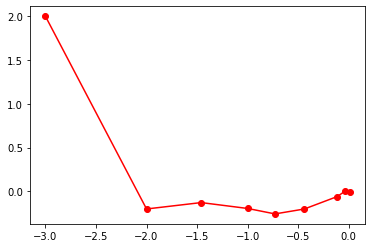

In [11]:
n = 8
alpha = np.linspace(0.1,1.0,n)

delta_xq = np.zeros((2,1))
gamma = np.zeros((2,1))
part1 = np.zeros((2,2))
part2 = np.zeros((2,2))
part3 = np.zeros((2,2))
part4 = np.zeros((2,2))
part5 = np.zeros((2,2))
part6 = np.zeros((2,1))
part7 = np.zeros((1,1))
part8 = np.zeros((2,2))
part9 = np.zeros((2,2))

xq = np.zeros((n+1,2))
xq[0] = x_start

g = np.zeros((n+1,2))
g[0] = dfdx(xq[0])

h = np.zeros((n+1,2,2))
h[0] = [[1, 0.0],[0.0, 1]]
for i in range(n):

    delta_xq = -np.dot(alpha[i],np.linalg.solve(h[i],g[i]))
    xq[i+1] = xq[i] + delta_xq

    g[i+1] = dfdx(xq[i+1])

    gamma = g[i+1]-g[i]
    part1 = np.outer(gamma,gamma)
    part2 = np.outer(gamma,delta_xq)
    part3 = np.dot(np.linalg.pinv(part2),part1)

    part4 = np.outer(delta_xq,delta_xq)
    part5 = np.dot(h[i],part4)
    part6 = np.dot(part5,h[i])
    part7 = np.dot(delta_xq,h[i])
    part8 = np.dot(part7,delta_xq)
    part9 = np.dot(part6,1/part8)

    h[i+1] = h[i] + part3 - part9

plt.plot(xq[:,0],xq[:,1],'r-o')


plt.show()